In [1]:
import scanpy as sc
import scFates as scf
sc.set_figure_params()

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

import matplotlib.pyplot as plt
scf.set_figure_pubready()

In [2]:
adata=sc.read("data/adata_tree_fitted.h5ad")
adata.var_names.name=None

In [3]:
r="A"
m=["Ia","Ib"]

In [4]:
scf.tl.test_fork(adata,r,milestones=m,n_jobs=20,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 4875/4875 [00:35<00:00, 139.28it/s]
    test for upregulation for each leave vs root
    upreg Ib: 100%|██████████| 2410/2410 [00:01<00:00, 1347.57it/s]
    finished (0:00:39) --> added 
    .uns['A->Ia<>Ib']['fork'], DataFrame with fork test results.


In [5]:
scf.tl.branch_specific(adata,r,milestones=m,effect=.5)

    branch specific features: Ib: 50, Ia: 33
    finished --> updated 
    .uns['A->Ia<>Ib']['fork'], DataFrame updated with additionnal 'branch' column.


In [6]:
#scf.tl.activation_lm(adata,r,milestones=m,n_jobs=10,fdr_cut=0.001)

In [7]:
scf.tl.activation(adata,r,milestones=m,n_jobs=10,nwin=10,deriv_cut=.3)

testing activation
    to Ib: 100%|██████████| 50/50 [00:00<00:00, 63.71it/s]
    threshold pseudotime is: 25.962369142213152
    12 early and 21 late features specific to leave Ia
    15 early and 35 late features specific to leave Ib
    finished (0:00:20) --> updated 
    .uns['A->Ia<>Ib']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


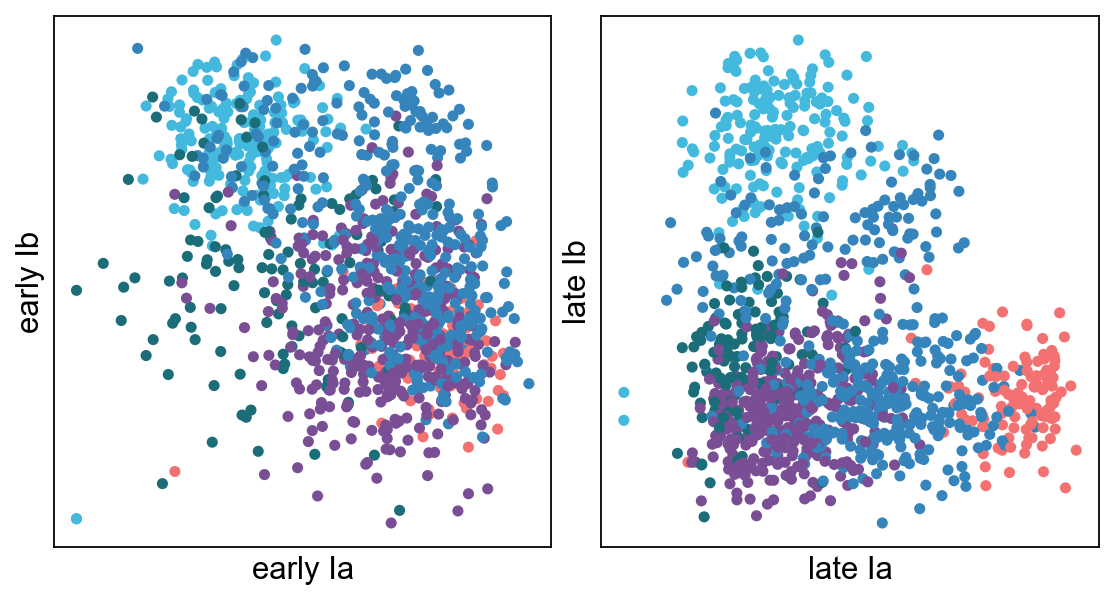

In [8]:
scf.pl.modules(adata,r,milestones=m)

In [9]:
adata

AnnData object with n_obs × n_vars = 2005 × 4875
    obs: 'batch', 'plate', 'devtime', 'n_genes_by_counts', 'total_counts', 'total_counts_ERCC', 'pct_counts_ERCC', 'leiden', 't', 'seg', 'edge', 'milestones', 'devtime_float'
    var: 'ERCC', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'm', 'v', 'n_obs', 'res', 'lp', 'lpa', 'qv', 'highly_variable', 'p_val', 'A', 'fdr', 'st', 'signi'
    uns: 'dendro_segments', 'devtime_colors', 'doublets_colors', 'draw_graph', 'graph', 'leiden', 'leiden_colors', 'log1p', 'milestones_colors', 'neighbors', 'ppt', 'pseudotime_list', 'seg_colors', 'stat_assoc_list', 'tsne', 'umap', 'A->Ia<>Ib'
    obsm: 'X_R', 'X_dendro', 'X_draw_graph_fa', 'X_msdiff', 'X_pca', 'X_tsne', 'X_umap'
    layers: 'fitted', 'palantir_imp', 'scaled'

In [10]:
adata_s=scf.tl.subset_tree(adata,r,milestones=m,copy=True)

subsetting tree
node 169 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:01) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> tree extracted
--> added 
    .obs['old_milestones'], previous milestones from intial tree


In [11]:
scf.tl.simplify(adata_s,n_nodes=2)

simplifying graph
node 7 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.
projecting cells onto the principal graph
    finished (0:00:00) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.
    finished (0:00:00) --> graph simplified


/home/lfaure/miniconda3/envs/bio-gpu-18/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


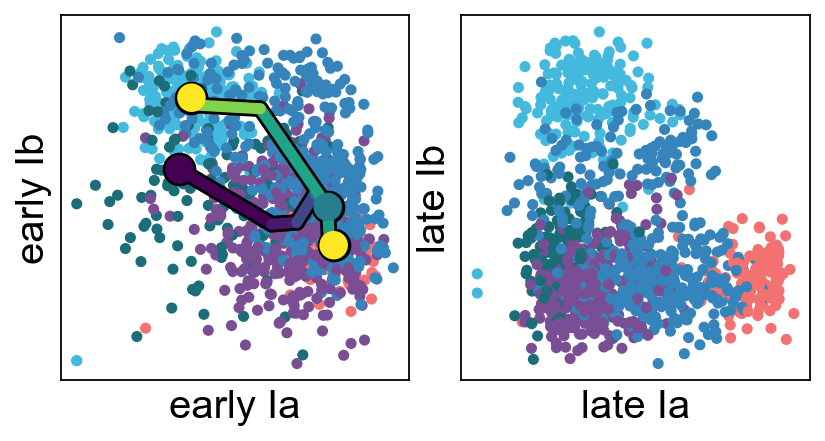

In [12]:
sc.set_figure_params(dpi_save=300,figsize=(3,3))

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(6,3),gridspec_kw=dict(wspace=.15))

scf.pl.modules(adata,r,milestones=m,
               ax_early=ax1,ax_late=ax2,show=False)
scf.pl.modules(adata_s,r,milestones=m,show_traj=True,alpha=0,
              ax_early=ax1,ax_late=ax2,show=False)
ax1.set_ylabel(ax1.get_ylabel(),fontsize=18)
ax1.set_xlabel(ax1.get_xlabel(),fontsize=18)
ax2.set_ylabel(ax2.get_ylabel(),fontsize=18)
ax2.set_xlabel(ax2.get_xlabel(),fontsize=18)
plt.savefig("figures/modules_fig4c.pdf",dpi=300)

In [13]:
scf.tl.slide_cells(adata,root_milestone="immature",milestones=m,win=50)
scf.tl.slide_cors(adata,root_milestone="immature",milestones=m,
                  genesetA=scf.get.fork_stats(adata,r,m,module="early",branch="Ia").index,
                  genesetB=scf.get.fork_stats(adata,r,m,module="early",branch="Ib").index)

--> added 
    .uns['immature->Ia<>Ib']['cell_freq'], probability assignment of cells on 35 non intersecting windows.
--> added 
    .uns['immature->Ia<>Ib']['corAB'], gene-gene correlation modules.


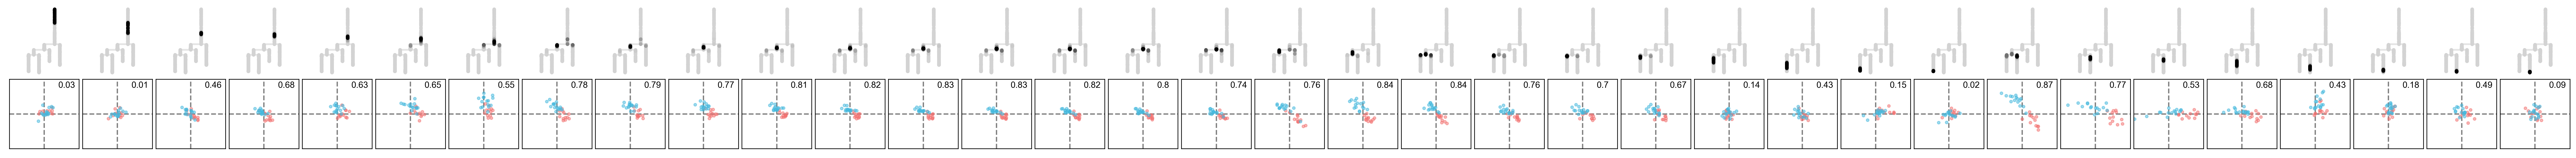

In [14]:
sc.set_figure_params(dpi=150,figsize=(2,4),dpi_save=600)
scf.pl.slide_cors(adata,basis="dendro",root_milestone="immature",milestones=m,linewidth_seg=2,alpha_seg=.1,s=1,
                  fig_height=3,point_size=10,fontsize=10,tree_behind=True,frame_emb=False)

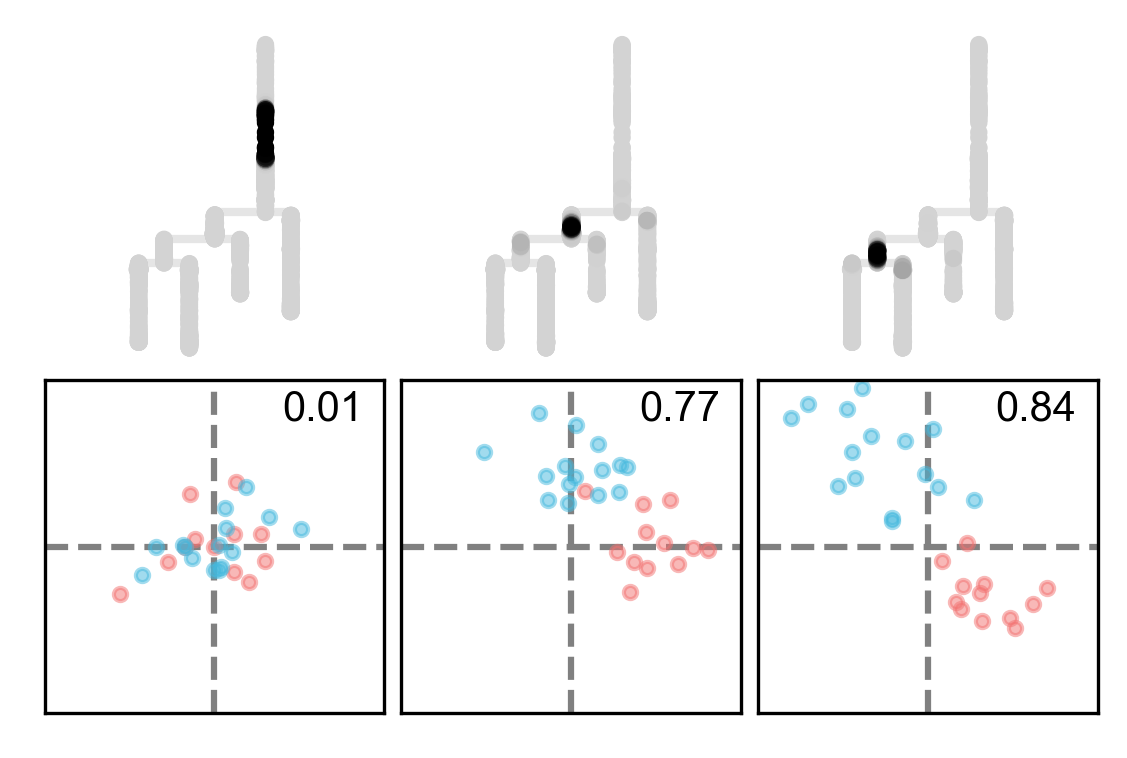

In [16]:
scf.pl.slide_cors(adata,basis="dendro",root_milestone="immature",milestones=m,linewidth_seg=2,alpha_seg=.1,s=1,
                  fig_height=3,point_size=10,fontsize=10,tree_behind=True,frame_emb=False,win_keep=[1,9,18],save="_fig4c.pdf")

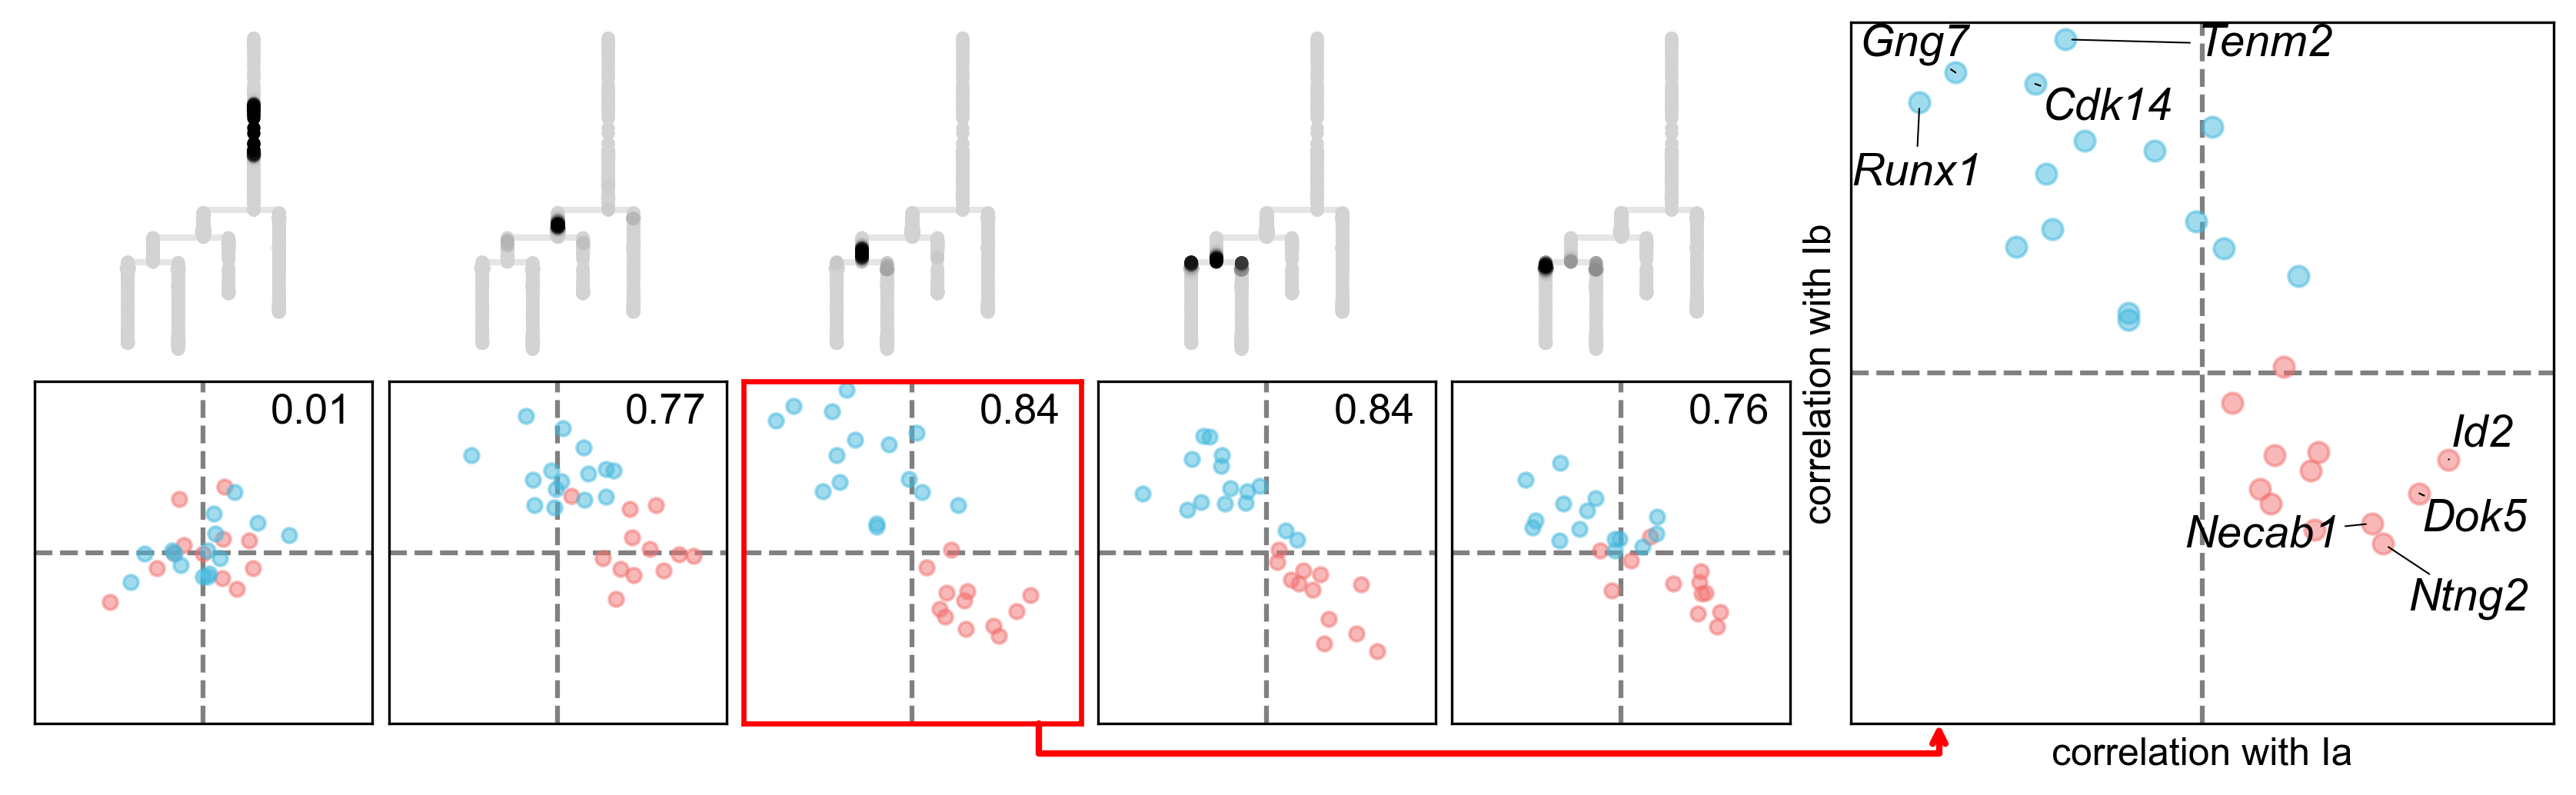

In [21]:
scf.pl.slide_cors(adata,basis="dendro",root_milestone="immature",milestones=m,fig_height=4,linewidth_seg=2,fontsize=13,
                  fontsize_focus=12,alpha_seg=.1,s=1,point_size=20,tree_behind=True,frame_emb=False,win_keep=[1,9,18,19,20],focus=2,
                 kwargs_text=dict(style="italic"),
                    kwargs_adjust=dict(expand_text=(1.5, 1.5),arrowprops=dict(arrowstyle="-", color='k', lw=0.5)),
                 save="_fig4c_focus.pdf")

In [36]:
adata.write("data/adata_C.h5ad")

In [21]:
n="<>".join(m)

In [22]:
df=adata.uns[f"{r}->{n}"]["fork"].copy()

In [23]:
df.index="\textit{"+df.index+"}"

In [24]:
eA=df.index[(df.module=="early") & (df.branch==m[0])]
lA=df.index[(df.module=="late") & (df.branch==m[0])]
eB=df.index[(df.module=="early") & (df.branch==m[1])]
lB=df.index[(df.module=="late") & (df.branch==m[1])]

In [25]:
import pandas as pd
dat=pd.DataFrame({'early A': pd.Series(eA), 
                  'late A': pd.Series(lA),
                  'early B': pd.Series(eB),
                  'late B': pd.Series(lB)})

In [26]:
dat=dat.fillna('')

In [27]:
dat=dat.to_latex(index=False,header=True,escape=False)

In [28]:
text_file = open("table_A.txt", "w")
 
#write string to file
text_file.write(dat)
 
#close file
text_file.close()

In [29]:
early_A="\\ \\ ".join(df.index[(df.module=="early") & (df.branch==m[0])])

In [30]:
late_A="\\ \\ ".join(df.index[(df.module=="late") & (df.branch==m[0])])

In [31]:
fname="fig4"

In [33]:
import numpy as np
np.array((239, 245, 243))/255

array([0.9372549 , 0.96078431, 0.95294118])

In [37]:
%%bash -s $fname $dat

echo $dat

cat<<EOF >$1.tex
\documentclass{article}
\usepackage[paperheight=250mm,paperwidth=300mm]{geometry}
\geometry{left=5mm,right=5mm,top=5mm,bottom=5mm,}
 
\usepackage[labelfont=bf]{caption}

\usepackage{booktabs}
\usepackage[rgb]{xcolor}
\usepackage{fontspec}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}
\usepackage{graphbox,graphicx} 
\usepackage{adjustbox}
\usepackage{tcolorbox}
\usepackage{makecell}

\definecolor{Acol}{rgb}{0.9372549 , 0.96078431, 0.95294118}

\begin{document}
\setmainfont{Arial}

\noindent
\large 

\fontsize{11pt}{11pt}\selectfont


\begin{minipage}[t]{.33\textwidth}
\begin{tcolorbox}[colback=Acol,left=0mm,right=0mm]

\begin{center}
\LARGE Bifurcation A


\normalsize Between Int. Ia/Ib/II-SGNs and Ic-SGNs
\end{center}
\vspace{-20pt}
\begin{center}
\includegraphics[width=\textwidth]{figures/slide_cors_fig4a.pdf}
\end{center}
\large
\vspace{-10pt}
\begin{center}
EOF
cat table_A.txt >> $1.tex

cat<<EOF >>$1.tex
\end{center}
\includegraphics[width=\textwidth]{figures/modules_fig4a.pdf}
\end{tcolorbox}
\end{minipage}\hfill

\clearpage
EOF
echo "\end{document}" >> $1.tex

xelatex --shell-escape $1.tex
rm $1.tex
convert -flatten -density 300 $1.pdf $1.jpg

identify $1.pdf


This is XeTeX, Version 3.14159265-2.6-0.999991 (TeX Live 2019/Debian) (preloaded format=xelatex)
 \write18 enabled.
entering extended mode
(./fig4.tex
LaTeX2e <2020-02-02> patch level 2
L3 programming layer <2020-02-14>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
(/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
(/usr/share/texlive/texmf-dist/tex/latex/booktabs/booktabs.sty)
(/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg)
(/usr/share/texlive/texmf-dist/

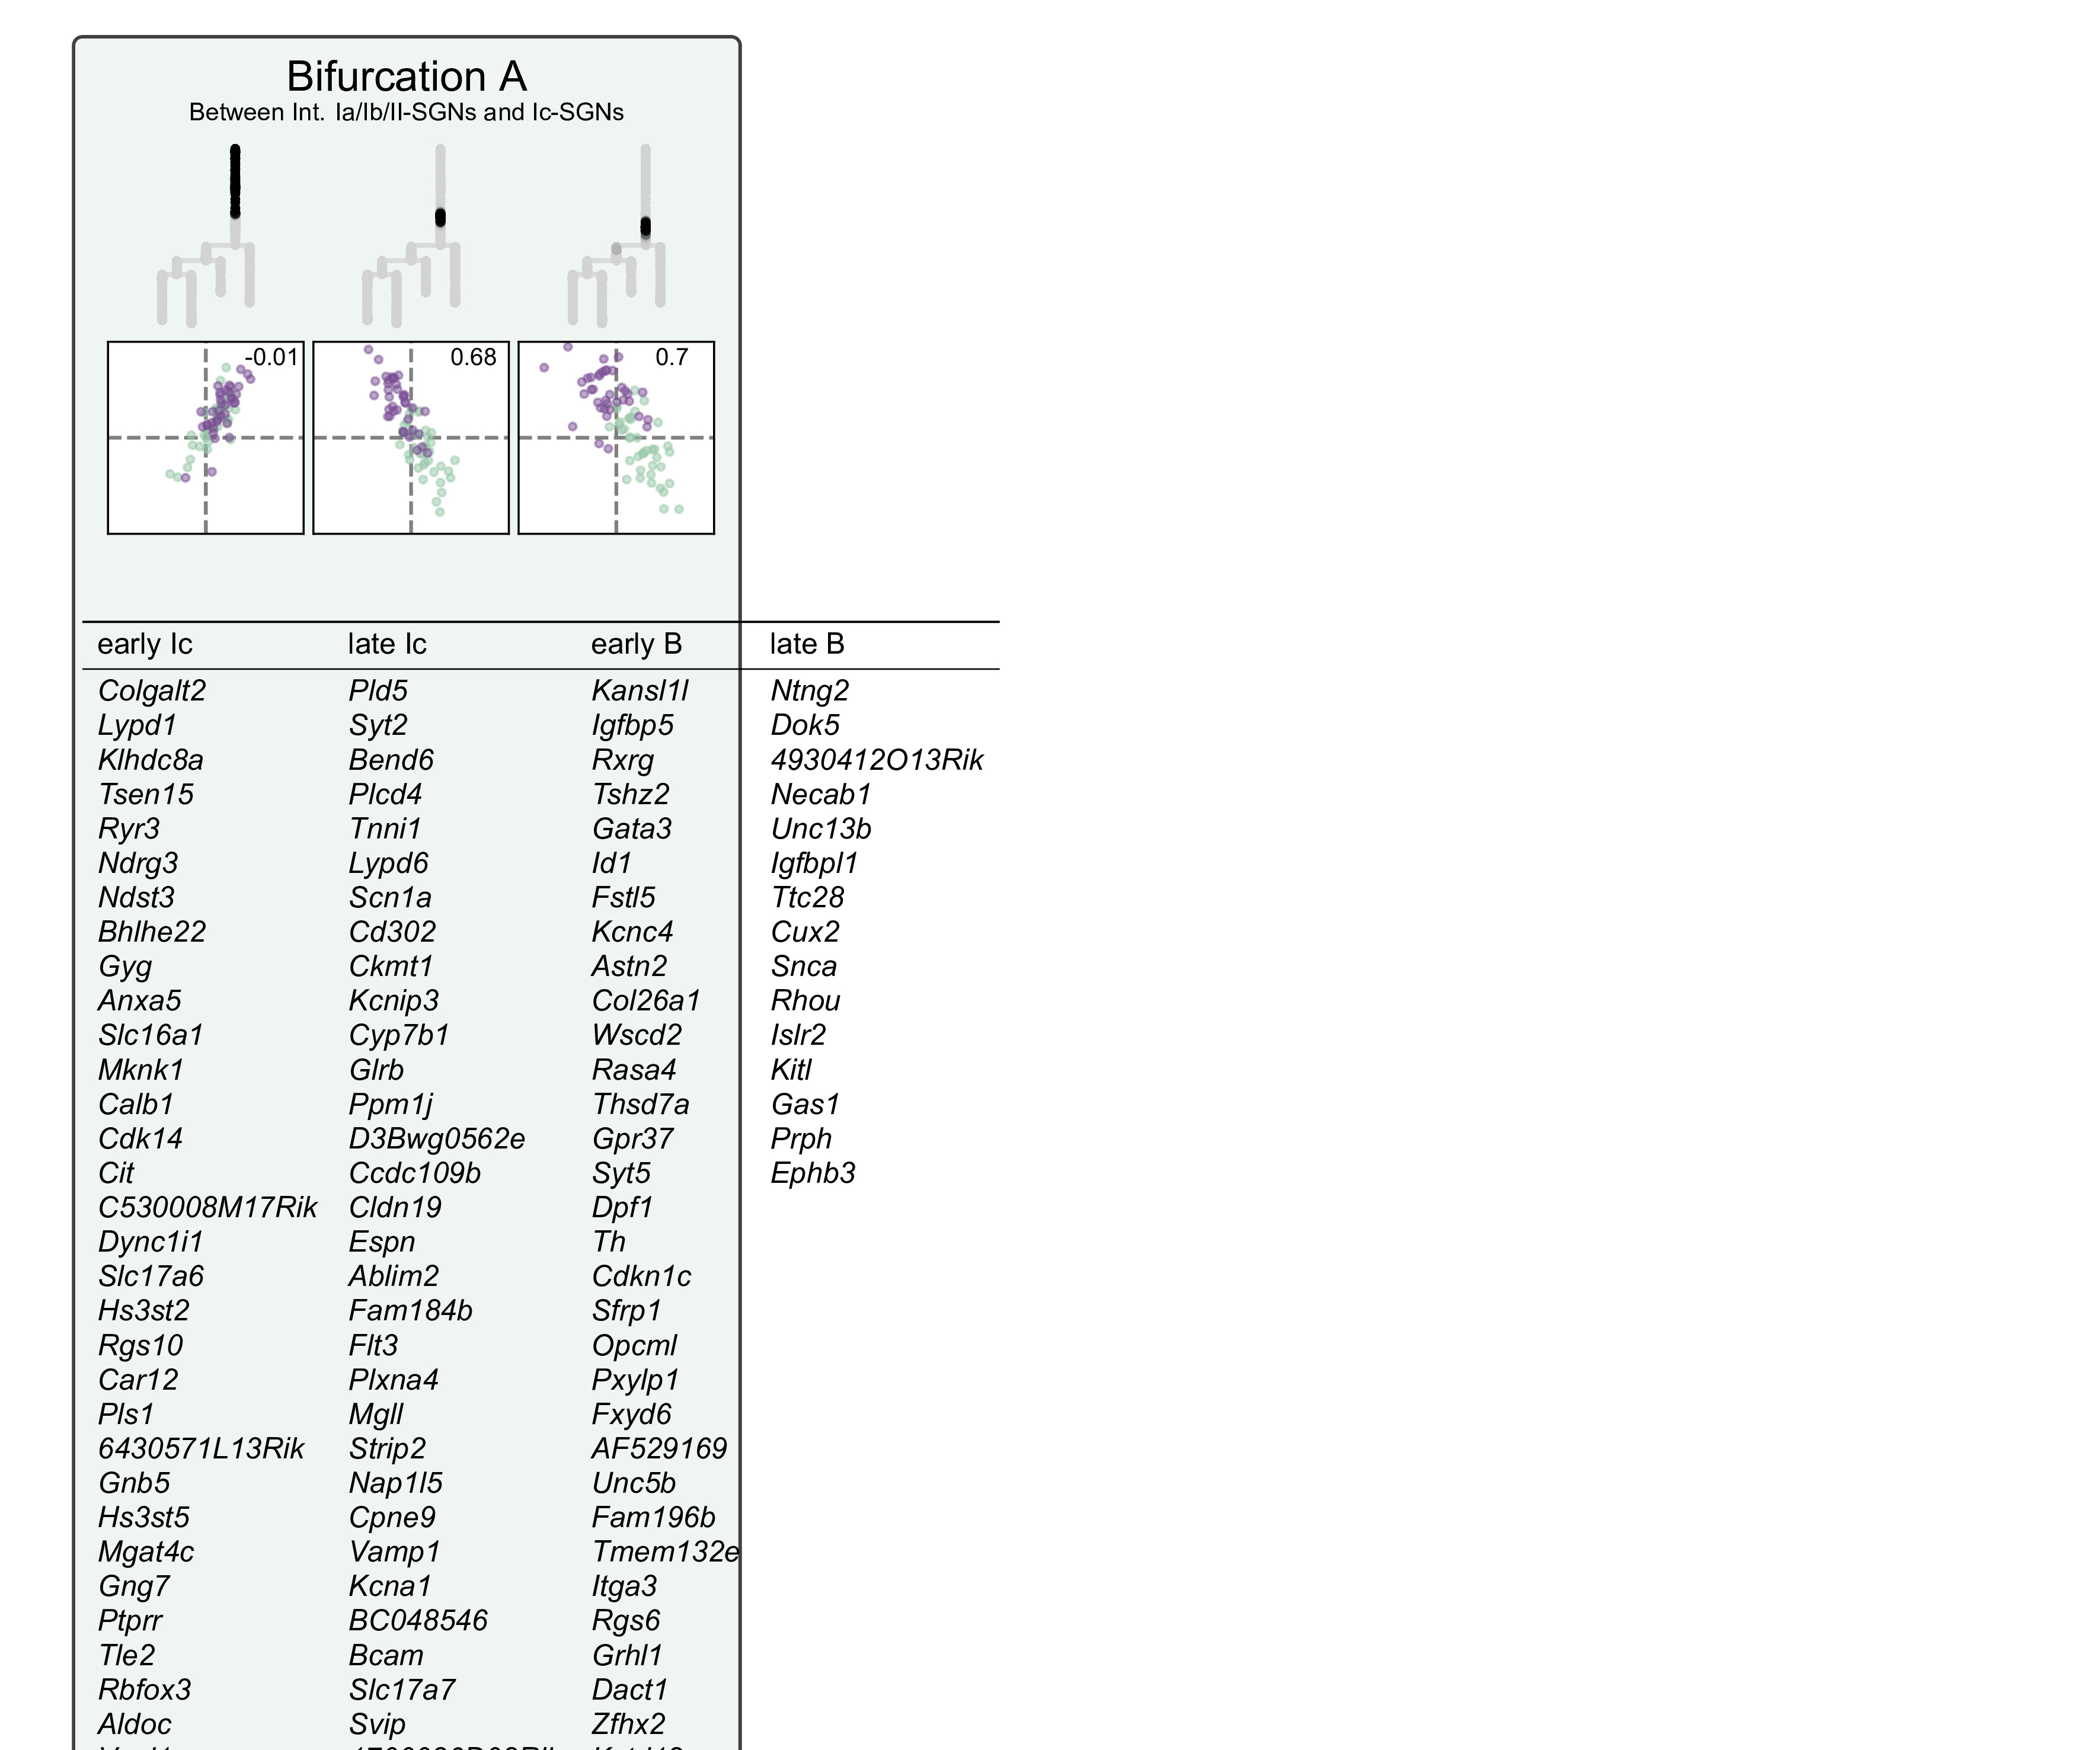

In [38]:
from IPython.display import Image
Image(filename=fname+'.jpg') 